In [1]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [2]:
elasticity = pd.read_csv("./output/new-elasticity.csv")

In [3]:
elasticity.head()

,θE,θI,ωij,ωii,shocks,assets
0,-10.908564,-1.000000,0.000066,0.005270,1.0,-0.500000
1,-9.540723,-1.004838,0.000120,0.004022,1.0,-0.414141
2,-8.575170,-1.007164,0.000098,0.000858,1.0,-0.328283
3,-6.849955,-0.850522,0.000065,0.000410,1.0,-0.242424
4,-6.526145,-0.850448,0.000046,0.000196,1.0,-0.156566


In [4]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

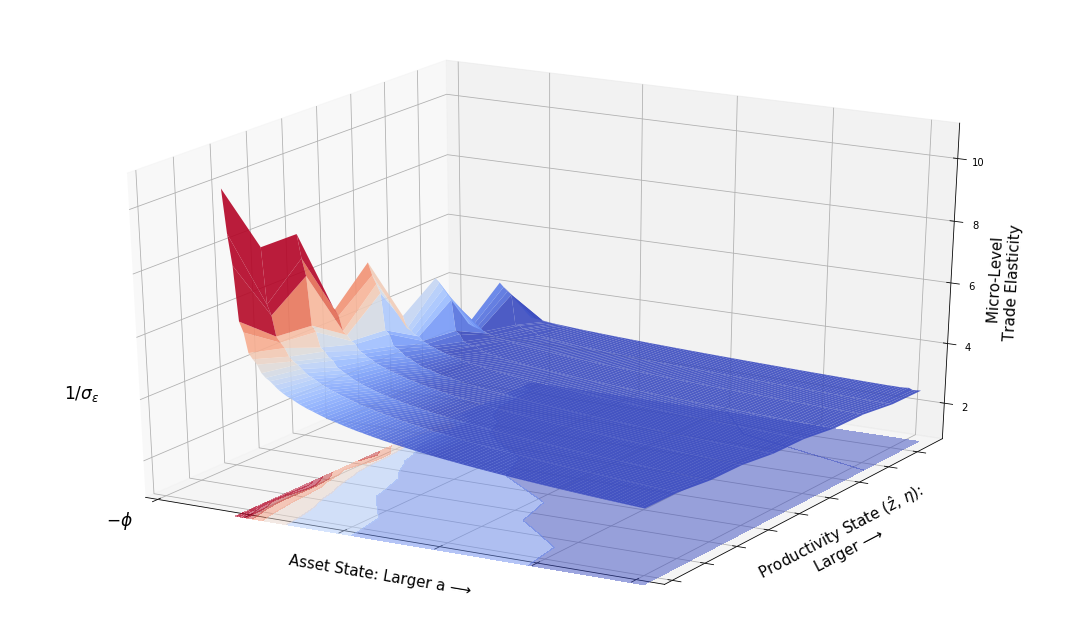

In [6]:
x, y, z = create_grid(elasticity,"assets","shocks","θE")

fig = plt.figure(figsize = [15.0,9.0], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, -1.0*z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=3.5, vmax=7),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = .50

ax.contourf(x, y, -1*z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=3, vmax=7), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.35)
ax.set_xticklabels([])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(1.0)

ax.text(-2.75, 0.25, 0, "$-\phi$", fontsize = 17)

ax.text(-3.5, 0.25, 4.0, "$1 / \sigma_{\epsilon}$", fontsize = 17)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Micro-Level\n Trade Elasticity ", fontsize = 15)

#plt.savefig("../notes/figures/micro-elasticity.pdf", bbox_inches = "tight")
#plt.savefig("../notes/figures/micro-elasticity.png")

plt.show()

In [48]:
trade_share = pd.read_csv("trade_share.csv")

C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


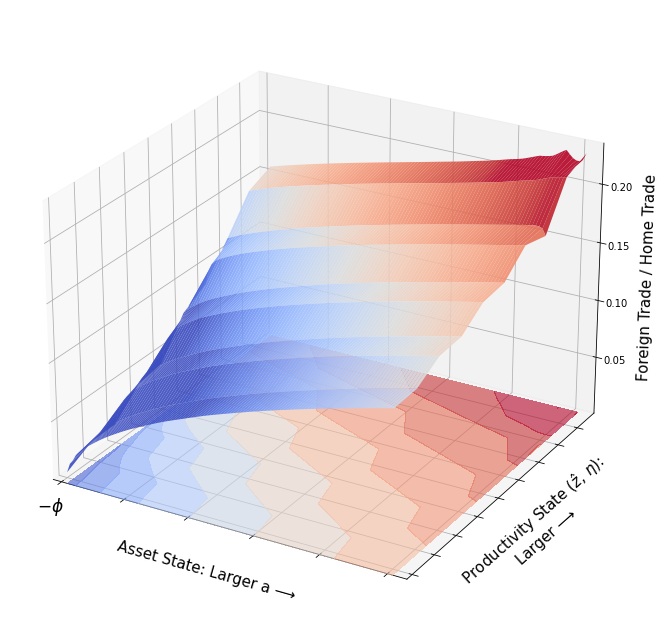

In [95]:
x, y, z = create_grid(trade_share,"asset","shock","elasticity")

fig = plt.figure(figsize = [15.0,9.0], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', norm=colors.Normalize(vmin=0.08, vmax=0.20),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.005

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', norm=colors.Normalize(vmin=0, vmax=0.20), 
                  alpha = 0.60, linestyles = "dashed")

ax.view_init(25,300)
ax.set_xlim(-2.05,8.35)
ax.set_xticklabels([])

ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.text(-2.75, 0.65, -.03, "$-\phi$", fontsize = 17)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n Foreign Trade / Home Trade ", fontsize = 15)

plt.savefig("../notes/figures/trade-share.pdf", bbox_inches = "tight")

plt.show()